In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime 
import sys

In [6]:
df = pd.read_csv("2017-5-5.csv")
df.head()

,id,topicID,groupID,time,user,parent,numChildren,chars_total,textchars,images
0,10001,119186,5001,2017-07-27T10:28:18+00:00,1001,NaN,0,1164,1073,0
1,10002,119186,5001,2017-07-27T10:57:39+00:00,1001,NaN,0,1051,976,0
2,10003,119186,5001,2017-07-27T14:38:11+00:00,1002,NaN,0,900,790,0
3,10004,119186,5001,2017-07-27T14:41:42+00:00,1002,NaN,1,686,585,0
4,10005,119186,5001,2017-08-02T03:05:12+00:00,1003,10004.0,0,205,118,0


In [7]:
ls= df.topicID.unique()
d={}
for i in ls:
    d[i]=data=df.loc[df['topicID']== i]
len(ls)

5

C:\Ananconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]
C:\Ananconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
C:\Ananconda3\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/s

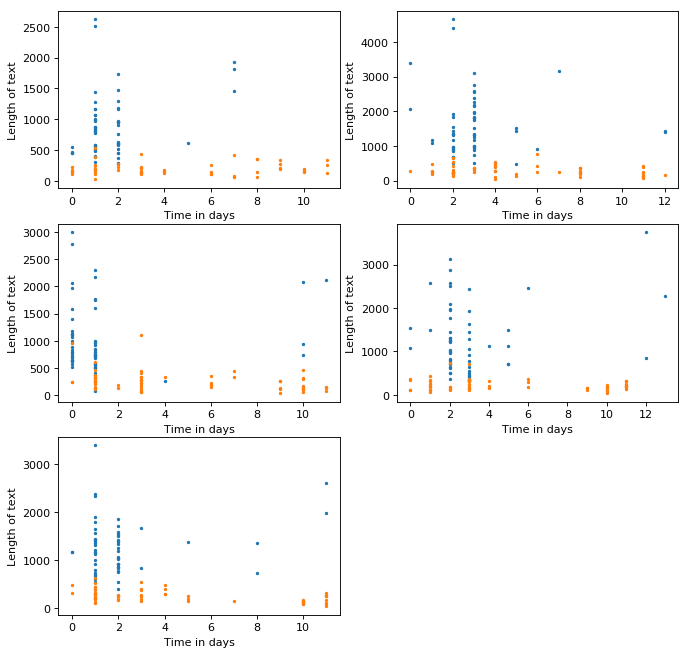

In [19]:



from matplotlib.pyplot import figure
figure(num=None, figsize=(10, 10), dpi=80, facecolor='w', edgecolor='k')
start=321
add=0
for i in ls:
   
    df1=d[i].loc[d[i]['parent'].isnull()]
    df2=d[i].loc[d[i]['parent'].notnull()]
    
    df1['time']=df1['time'].apply(lambda x: datetime.strptime(x.split('T')[0].replace('-',' '),"%Y %m %d"))
    t0 = min(df1['time'])
    df1['time']=df1['time'].apply(lambda x: (x-t0).days)
    
    df2['time']=df2['time'].apply(lambda x: datetime.strptime(x.split('T')[0].replace('-',' '),"%Y %m %d"))
    t0 = min(df2['time'])
    df2['time']=df2['time'].apply(lambda x: (x-t0).days)
    
    x = df1['time'].values
    y = df1['textchars']
    
    p =df2['time'].values
    q =df2['textchars']
    

    val= start+add
    
    plt.subplot(val)
    plt.scatter(x,y,s=4)
    plt.scatter(p,q,s=4)
    plt.xlabel('Time in days', fontsize=10)
    plt.ylabel('Length of text', fontsize='medium')
    add=add+1
  

plt.show()